Original Image:


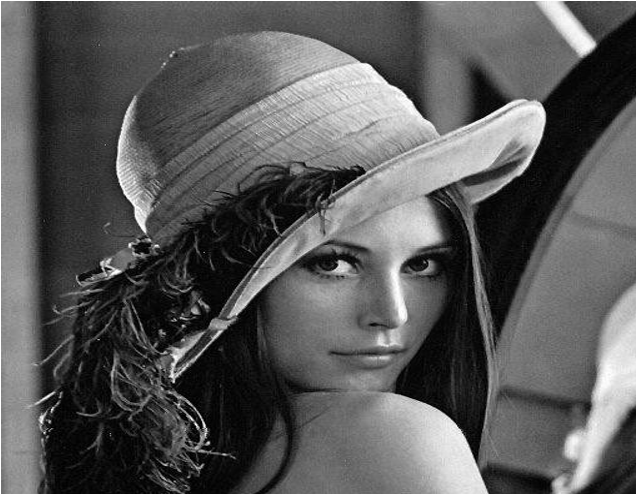

Mask:


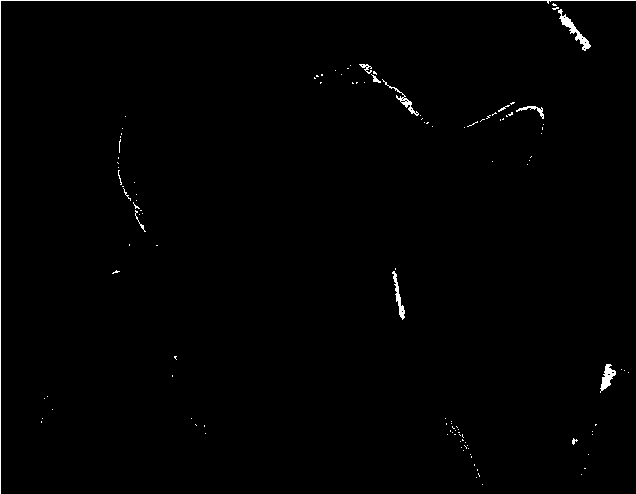

Inpainted Image:


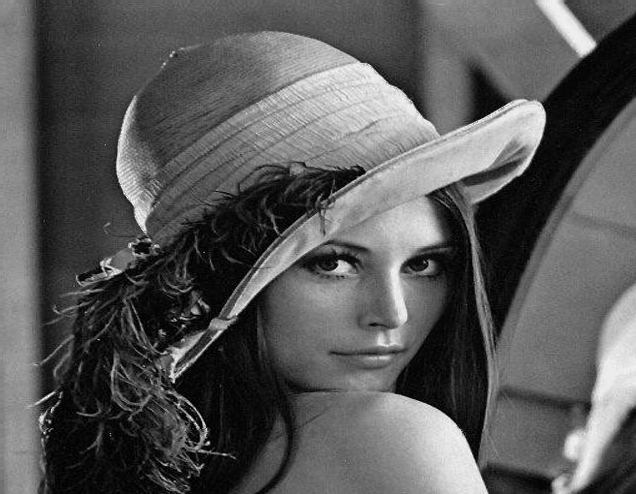

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load noisy image
img = cv2.imread('/content/image-1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a binary mask where noise is white
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

# Inpaint the image
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Show results
print("Original Image:")
cv2_imshow(img)

print("Mask:")
cv2_imshow(mask)

print("Inpainted Image:")
cv2_imshow(dst)


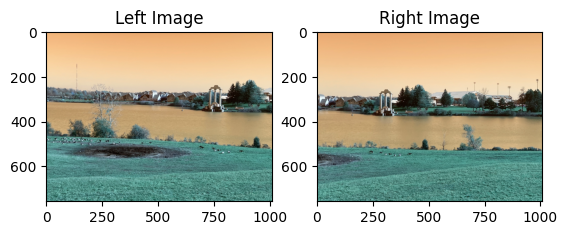

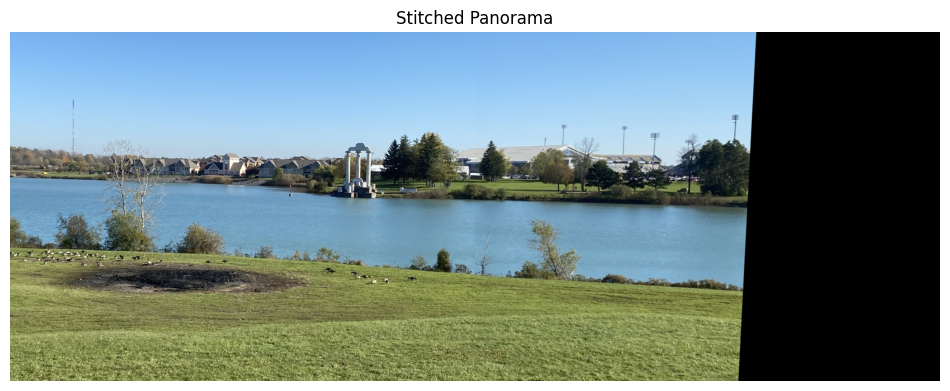

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


img1 = cv2.imread('/content/left.jpg')
img2 = cv2.imread('/content/right.jpg')

# Feature detection
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Feature matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort and extract matched points
matches = sorted(matches, key=lambda x: x.distance)
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

# Homography
H, _ = cv2.findHomography(pts2, pts1, cv2.RANSAC)

# Warp
result = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))
result[0:img1.shape[0], 0:img1.shape[1]] = img1

# Convert BGR to RGB for proper color display
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1); plt.imshow(img1); plt.title("Left Image")
plt.subplot(1,2,2); plt.imshow(img2); plt.title("Right Image")


plt.figure(figsize=(12, 6))
plt.imshow(result_rgb)
plt.title("Stitched Panorama")
plt.axis('off')
plt.show()


✅ Number of good matches after filtering: 1192
📐 Rotation Matrix (R):
 [[ 0.99501309  0.019207   -0.09787768]
 [-0.01069754  0.99617407  0.08673402]
 [ 0.09916911 -0.08525443  0.99141171]]
🚀 Translation Vector (t):
 [[-0.98996895]
 [-0.1317566 ]
 [-0.0510066 ]]


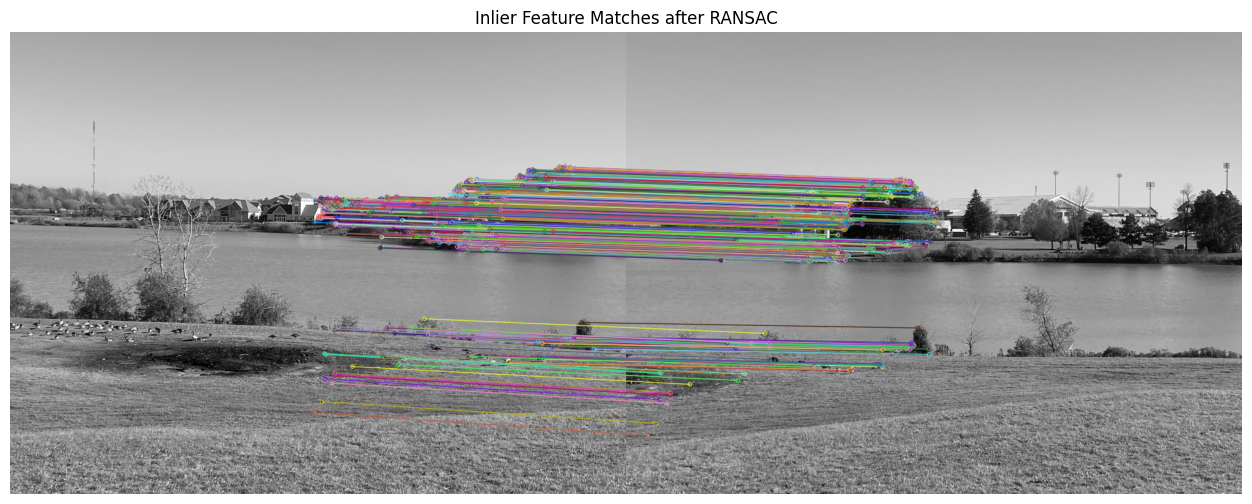

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images (grayscale)
img1 = cv2.imread("/content/left.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/right.jpg", cv2.IMREAD_GRAYSCALE)

# Check image load
if img1 is None or img2 is None:
    raise ValueError("Make sure both images are uploaded and file paths are correct!")

# Step 1: ORB keypoint detection
orb = cv2.ORB_create(5000)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Step 2: Feature matching (Brute-force with Hamming distance)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1, des2, k=2)

# Step 3: Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"✅ Number of good matches after filtering: {len(good_matches)}")

# Step 4: Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Step 5: Estimate Fundamental Matrix (with RANSAC)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
pts1_inliers = pts1[mask.ravel() == 1]
pts2_inliers = pts2[mask.ravel() == 1]

# Step 6: Assume camera intrinsics matrix (K)
K = np.array([[800, 0, img1.shape[1] / 2],
              [0, 800, img1.shape[0] / 2],
              [0, 0, 1]])  # Focal length & center — tune based on actual camera if known

# Step 7: Essential Matrix
E, _ = cv2.findEssentialMat(pts1_inliers, pts2_inliers, K)

# Step 8: Recover relative pose (R, t)
_, R, t, _ = cv2.recoverPose(E, pts1_inliers, pts2_inliers, K)

# Step 9: Print motion
print("📐 Rotation Matrix (R):\n", R)
print("🚀 Translation Vector (t):\n", t)

# Step 10: Draw matches (inliers only)
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, [good_matches[i] for i in range(len(mask)) if mask[i]], None, flags=2)

plt.figure(figsize=(18, 6))
plt.title("Inlier Feature Matches after RANSAC")
plt.imshow(img_matches)
plt.axis('off')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 250ms/step - loss: 0.1204 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 243ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 235ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 246ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 237ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 234ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 237ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 240ms/step - loss: 0.1119 - val_loss: 0.1140
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Averag

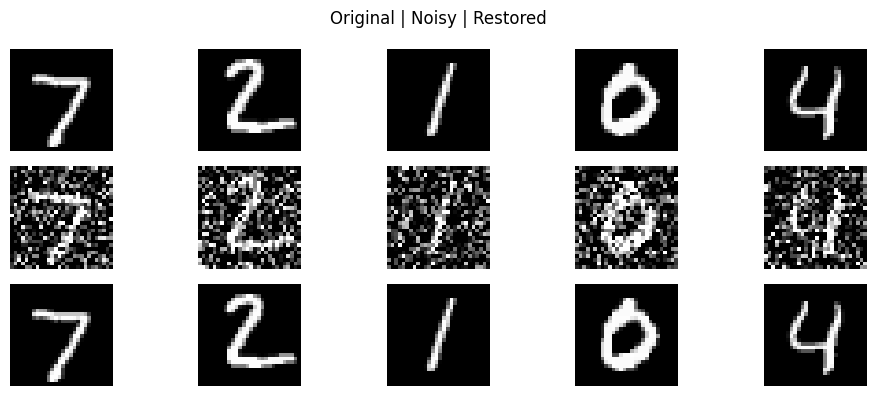

In [ ]:
# ================================
# IMAGE RESTORATION WITH AUTOENCODER (MNIST)
# ================================
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# Step 1: Load & Preprocess Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Step 2: Simulate Degradation (Gaussian Noise)
def add_noise(images):
    noise = np.random.normal(loc=0.0, scale=0.5, size=images.shape)
    noisy = np.clip(images + noise, 0., 1.)
    return noisy

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Step 3: Autoencoder Model
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output_img = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train Model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Step 5: Evaluate & Plot
predicted = autoencoder.predict(x_test_noisy)

# PSNR
print("Average PSNR:", np.mean([psnr(x_test[i], predicted[i]) for i in range(100)]))

# Plot Examples
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, n, i+1+2*n)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Original | Noisy | Restored")
plt.tight_layout()
plt.show()



In [ ]:
# UNET - Image Segmentation
!pip install -q tensorflow_datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load Oxford-IIIT Pet Dataset
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)  # auto-gets latest

def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

def load_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
    return normalize(input_image, input_mask)

# Prepare data
train = dataset['train'].map(load_image).cache().shuffle(1000).batch(16)
test = dataset['test'].map(load_image).batch(16)

# U-Net Model
def unet_model():
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])

    c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    # Decoder
    u5 = tf.keras.layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    u6 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c1])
    c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    outputs = tf.keras.layers.Conv2D(3, 1, activation='softmax')(c7)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = unet_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs=5, validation_data=test)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.DNJO88_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.DNJO88_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.
Epoch 1/5
159/230 ━━━━━━━━━━━━━━━━━━━━ 25:48 22s/step - accuracy: 0.5887 - loss: 0.9489

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 2, 2, 256)      │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 4, 4, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 8, 8, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,367,425 (5.22 MB)

 Trainable params: 1,366,465 (5.21 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 0.0256 - val_loss: 0.0489
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.0150 - val_loss: 0.0180
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0129 - val_loss: 0.0144
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0117 - val_loss: 0.0134
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0111 - val_loss: 0.0126
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0106 - val_loss: 0.0119
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0101 - val_loss: 0.0109
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0098 - val_loss: 0.0111
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0094 - val_loss: 0.0104
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0089 - val_loss: 0.0097
Epoch 12/100
391/391 ━━━━━━

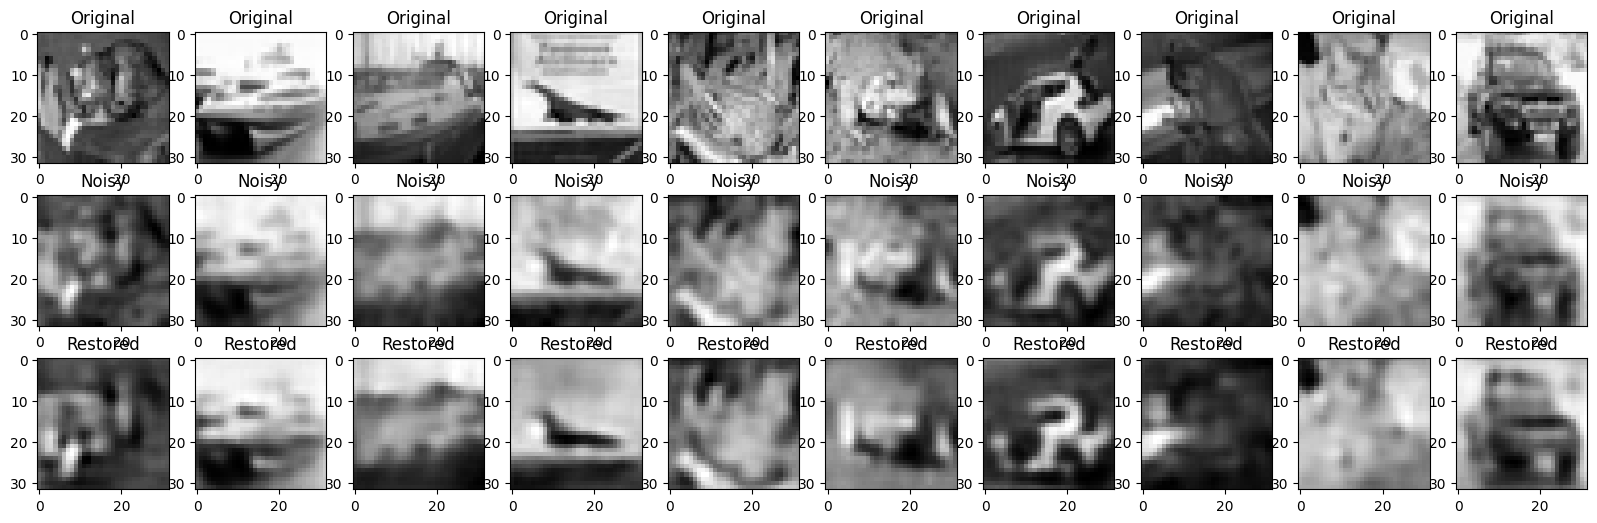

PSNR values:
22.23709
21.571514
23.760897
23.078661
22.050827
24.56289
21.938065
25.70561
23.497177
22.010729


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models



(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train_gray = np.mean(x_train, axis=-1, keepdims=True)
x_test_gray = np.mean(x_test, axis=-1, keepdims=True)


def add_noise(img):
    noise = np.random.normal(0, 0.1, img.shape)  # gaussian noise
    return np.clip(img + noise, 0., 1.)

def add_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# adding noise and blur to the images
x_train_noisy = np.array([add_blur(add_noise(img)) for img in x_train_gray])
x_test_noisy = np.array([add_blur(add_noise(img)) for img in x_test_gray])

def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 1))

    # encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # increase filter size and depth
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)


    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    return autoencoder


autoencoder = build_autoencoder()
autoencoder.summary()


autoencoder.fit(x_train_noisy, x_train_gray, epochs=100, batch_size=128, validation_data=(x_test_noisy, x_test_gray))

restored_images = autoencoder.predict(x_test_noisy)


n = 10  # no. of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Original')

    # noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Noisy')

    # restored image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(restored_images[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Restored')

plt.show()

#PSNR values
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)


psnr_values = [psnr(x_test_gray[i], restored_images[i]) for i in range(n)]


print("PSNR values:")
for value in psnr_values:
    print(value.numpy())  # tensor to a NumPy array to get the

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set global hyperparameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = len(train_generator.class_indices)


# Data preprocessing
train_dir = '/content/drive/MyDrive/ACV Lab/Dog Breed Classification/train'
val_dir = '/content/drive/MyDrive/ACV Lab/Dog Breed Classification/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

def build_model(base_model):
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Load MobileNet variants
mobilenet_v1 = tf.keras.applications.MobileNet(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')
mobilenet_v2 = tf.keras.applications.MobileNetV2(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')
mobilenet_v3 = tf.keras.applications.MobileNetV3Large(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')

models = {
    'MobileNet V1': build_model(mobilenet_v1),
    'MobileNet V2': build_model(mobilenet_v2),
    'MobileNet V3': build_model(mobilenet_v3),
}

# Compile and train all models
for name, model in models.items():
    print(f"\nTraining {name}...\n")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_generator,
              epochs=EPOCHS,
              validation_data=val_generator)

In [ ]:
for name, model in models.items():
    val_loss, val_acc = model.evaluate(val_generator)
    print(f"{name} - Validation Accuracy: {val_acc:.4f}")